In [1]:
import pandas as pd
import numpy as np
day=pd.read_csv('day.csv')
df=day.copy()
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# 1. Visaulization

In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## 1) Coefficient

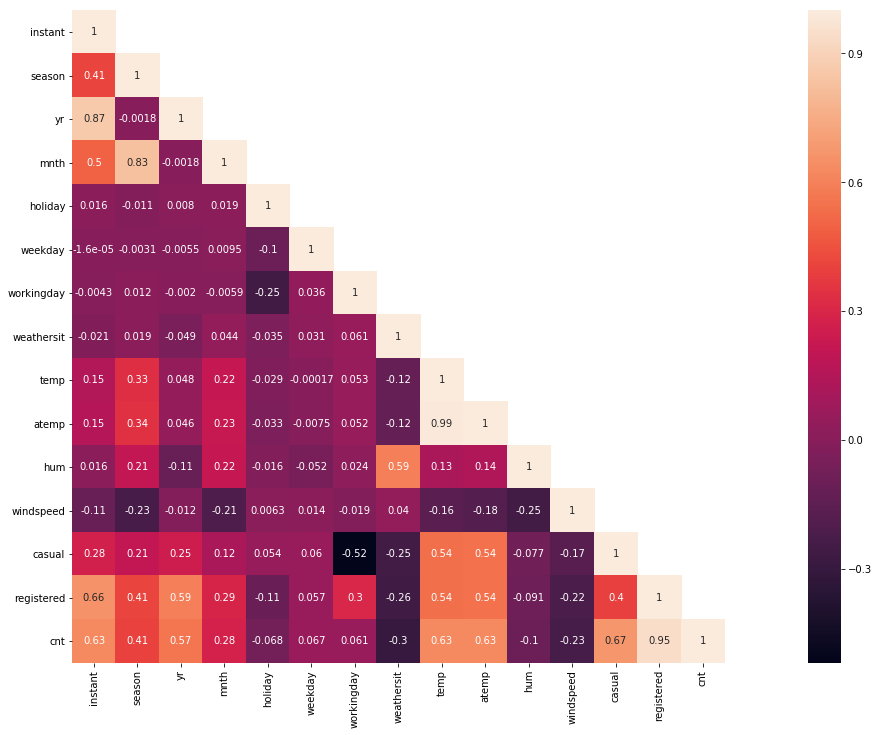

In [3]:
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

## 2) Plot for numerical variable

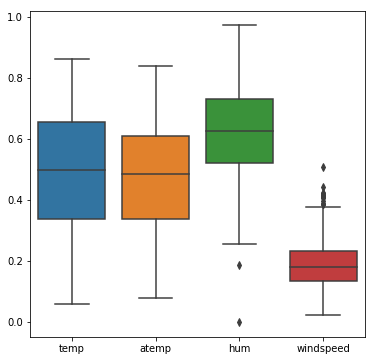

In [4]:
sns.boxplot(data=df[['temp','atemp', 'hum', 'windspeed']])
fig=plt.gcf()
fig.set_size_inches(6,6)

### - Temp

C:\usr\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\usr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


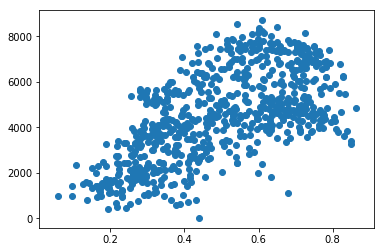

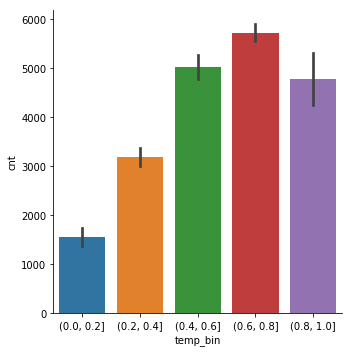

In [5]:
plt.scatter(x="temp",y="cnt",data=df)
bins = [0,0.2,0.4,0.6,0.8,1]
df['temp_bin'] = pd.cut(df['temp'],bins)
sns.factorplot(x='temp_bin',y="cnt",data=df,kind='bar')

### - Windspeed

C:\usr\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\usr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


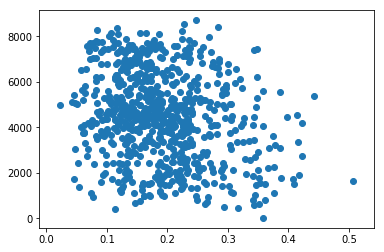

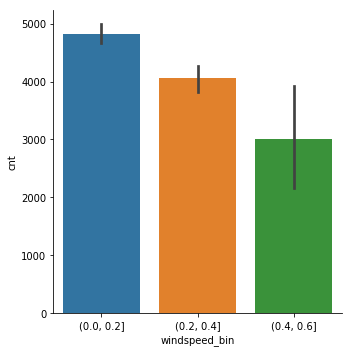

In [6]:
plt.scatter(x="windspeed",y="cnt",data=df)
bins = [0,0.2,0.4,0.6]
df['windspeed_bin'] = pd.cut(df['windspeed'],bins)
sns.factorplot(x="windspeed_bin",y="cnt",data=df,kind='bar')

### - Humidity

C:\usr\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\usr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


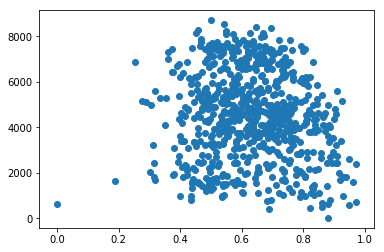

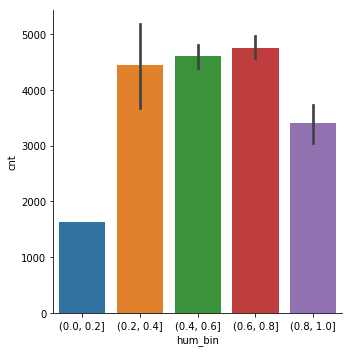

In [7]:
plt.scatter(x="hum",y="cnt",data=df)
bins = [0,0.2,0.4,0.6,0.8,1]
df['hum_bin'] = pd.cut(df['hum'],bins)
sns.factorplot(x="hum_bin",y="cnt",data=df,kind='bar')

## 3. Plot For Time Data (year, month, workingday or not)

In [8]:
df["yr(humanized)"] = df["yr"] + 2011

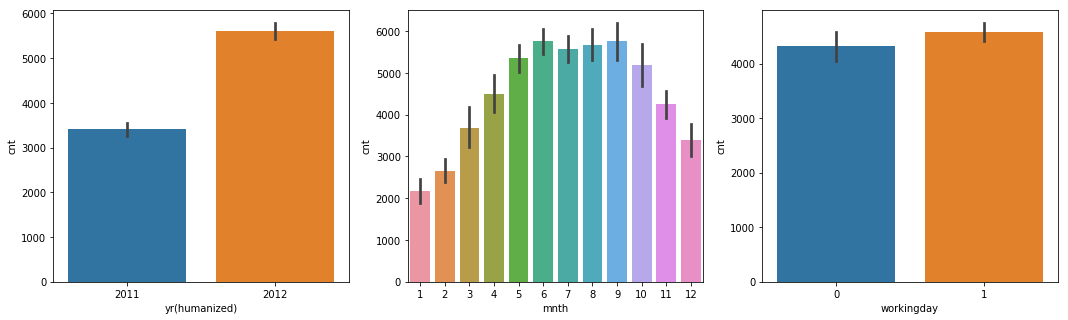

In [9]:
figure, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18, 5)
sns.barplot(data=df, x="yr(humanized)", y="cnt", ax=ax1)
sns.barplot(data=df, x="mnth", y="cnt", ax=ax2)
sns.barplot(data=df, x="workingday", y="cnt", ax=ax3)

In [10]:
df["yr(str)"] = df["yr(humanized)"].astype('str')
df["mnth(str)"] = df["mnth"].astype('str')
df["yr_mnth"] = df["yr(str)"] + "-" + df["mnth(str)"]
print(df.shape)
df[["yr(humanized)","mnth", "yr_mnth"]].head()

(731, 23)


,yr(humanized),mnth,yr_mnth
0,2011,1,2011-1
1,2011,1,2011-1
2,2011,1,2011-1
3,2011,1,2011-1
4,2011,1,2011-1


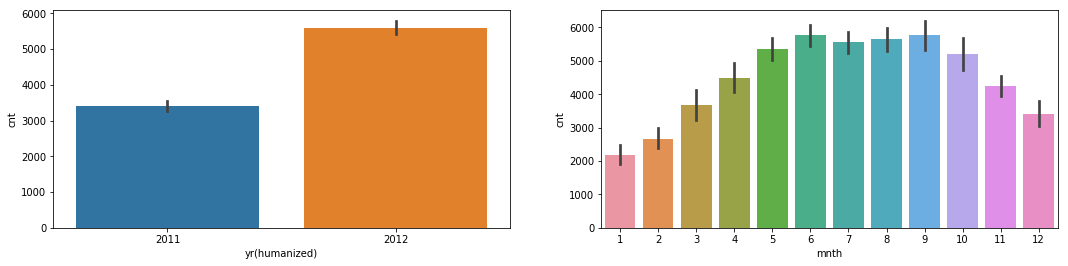

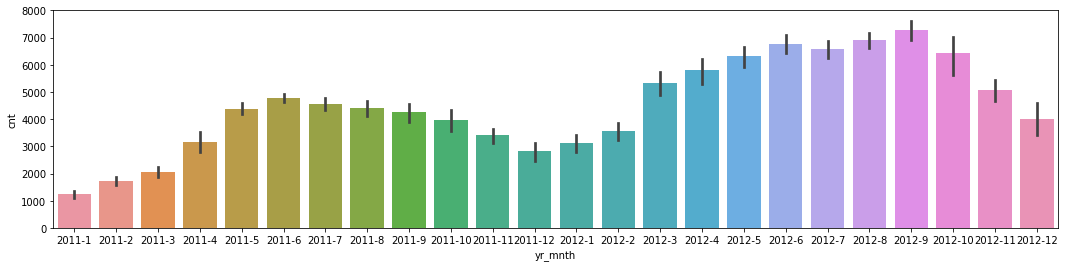

In [11]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=df, x="yr(humanized)", y="cnt", ax=ax1)
sns.barplot(data=df, x="mnth", y="cnt", ax=ax2)
figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)
sns.barplot(data=df, x="yr_mnth", y="cnt", ax=ax3)

In [12]:
df.drop(['yr(humanized)','mnth(str)','yr(str)','yr_mnth','hum_bin','temp_bin','windspeed_bin'],inplace=True,axis=1)

# 2. Data Processing

In [13]:
df1=df.drop(['instant','dteday','atemp','casual','registered'],1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


## df1은 확실히 x변수가 될 수 없는 instant dteday atemp casual registere만을 제거하여 최대한 많은 x변수를 확보한 경우이다. 후술하겠지만 발표 이후 심화 학습에서는 R.F. parameter importance check나 VIF check를 통하여 이를 변주해보았다. 

In [14]:
season=pd.get_dummies(df1['season'],prefix='season')
df1=pd.concat([df1,season],axis=1)

weather=pd.get_dummies(df1['weathersit'],prefix='weathersit')
df1=pd.concat([df1,weather],axis=1)

df1.drop(['holiday','weekday','season','weathersit','season_4','weathersit_3'],inplace=True,axis=1)
df1.head()

,yr,mnth,workingday,temp,hum,windspeed,cnt,season_1,season_2,season_3,weathersit_1,weathersit_2
0,0,1,0,0.344167,0.805833,0.160446,985,1,0,0,0,1
1,0,1,0,0.363478,0.696087,0.248539,801,1,0,0,0,1
2,0,1,1,0.196364,0.437273,0.248309,1349,1,0,0,1,0
3,0,1,1,0.200000,0.590435,0.160296,1562,1,0,0,1,0
4,0,1,1,0.226957,0.436957,0.186900,1600,1,0,0,1,0


## 더미변수화를 하고 season 과 weathersit에서 카테고리를 하나씩 빼준다

In [15]:
import numpy as np
x1 = df1.loc[:, df1.columns != 'cnt']
y1 = np.log(df1['cnt'])

## x와 y를 지정한다. 이 때 y를 log변환했다.

In [16]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, random_state=6, test_size=0.2)

# 3. Model Selection

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
Model = []
RMSE = []
R_sq = []
cv = KFold(10, random_state = 3)

def input_scores(name, model, x1, y1):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x1, y1, cv=cv, 
                                               scoring='neg_mean_squared_error')))
    R_sq.append(cross_val_score(model, x1, y1, cv=cv, scoring='r2'))


In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVR

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor', 'Elastic Net', 'PLS', 'Bagging', 'SVR']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor(), ElasticNet(), PLSRegression(), BaggingRegressor(), SVR()]

for name, model in zip(names, models):
    input_scores(name, model, x_train1, y_train1)

C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

# 4. Cross Validation

In [19]:
evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


,Model,RMSE,R Squared
0,Linear Regression,"[0.21960570149824624, 0.25647320809548757, 0.6...","[0.8377246964225017, 0.8278444128054844, 0.425..."
1,Ridge Regression,"[0.22342772332900493, 0.26953395898449095, 0.6...","[0.8320270582753956, 0.8098641133132813, 0.400..."
2,Lasso Regression,"[0.5517521608597431, 0.6200479415762207, 0.906...","[-0.024361607794713303, -0.006207740081449753,..."
3,K Neighbors Regressor,"[0.2020495771965962, 0.3222214754169732, 0.736...","[0.8626334156023971, 0.728264688778028, 0.3264..."
4,Decision Tree Regressor,"[0.7710363159964104, 0.29685474442818516, 0.74...","[-1.0663102197843926, 0.7536193542630628, 0.26..."
5,Random Forest Regressor,"[0.21013064981942348, 0.18945195771413836, 0.7...","[0.7829616048762403, 0.8485290003067836, 0.307..."
6,Gradient Boosting Regressor,"[0.21804991244142832, 0.19647265017539034, 0.6...","[0.8437696899032613, 0.8990677353190359, 0.436..."
7,Adaboost Regressor,"[0.32870435454956903, 0.34815143376814595, 0.7...","[0.640112298846753, 0.7377145334598438, 0.3117..."
8,Elastic Net,"[0.5517521608597431, 0.619597210007827, 0.9085...","[-0.024361607794713303, -0.004745386220593062,..."
9,PLS,"[0.248556001719136, 0.35060127440375455, 0.757...","[0.7921195174927916, 0.678290345434931, 0.2882..."


In [20]:
ar2=[evaluation.loc[i, 'R Squared'] for i in range(0,12)]
ar2

[array([0.8377247 , 0.82784441, 0.42539438, 0.83419242, 0.82619928,
        0.62713031, 0.85230809, 0.70119813, 0.74965855, 0.64639613]),
 array([0.83202706, 0.80986411, 0.40051493, 0.8285445 , 0.82404383,
        0.64925572, 0.84368778, 0.71754226, 0.7716095 , 0.66913179]),
 array([-0.02436161, -0.00620774, -0.02005665, -0.0065971 , -0.01252362,
        -0.00037178, -0.00111288, -0.00372407, -0.00441976, -0.00053439]),
 array([0.86263342, 0.72826469, 0.32649131, 0.8569162 , 0.67587383,
        0.64671778, 0.8901738 , 0.68467141, 0.69025969, 0.78133939]),
 array([-1.06631022,  0.75361935,  0.26803253,  0.84829744,  0.7589511 ,
         0.51657228,  0.71026201,  0.41092716,  0.58551174,  0.8367595 ]),
 array([0.7829616 , 0.848529  , 0.30729656, 0.85582702, 0.8223441 ,
        0.73595036, 0.92180109, 0.70687267, 0.8095225 , 0.7622264 ]),
 array([0.84376969, 0.89906774, 0.43697825, 0.88423259, 0.84051523,
        0.75978706, 0.93278208, 0.81051334, 0.826472  , 0.69919545]),
 array([0.6401

In [21]:
arm=[evaluation.loc[i, 'RMSE'] for i in range(0,12)]
arm

[array([0.2196057 , 0.25647321, 0.68068108, 0.21760367, 0.22462958,
        0.3103001 , 0.19846675, 0.28037119, 0.31246425, 0.31628492]),
 array([0.22342772, 0.26953396, 0.6952611 , 0.22127877, 0.2260182 ,
        0.300953  , 0.20417655, 0.27259536, 0.29845095, 0.30594792]),
 array([0.55175216, 0.62004794, 0.90692399, 0.53615687, 0.54218031,
        0.50825785, 0.51671483, 0.51386483, 0.62588072, 0.53202984]),
 array([0.20204958, 0.32222148, 0.73693697, 0.20214326, 0.30675964,
        0.30203986, 0.17114428, 0.2880205 , 0.34756242, 0.24871687]),
 array([0.77103632, 0.29685474, 0.74731511, 0.21344633, 0.25395497,
        0.33035484, 0.27954957, 0.3824703 , 0.40190788, 0.24349989]),
 array([0.21013065, 0.18945196, 0.74826578, 0.18098351, 0.24731475,
        0.28839606, 0.13964726, 0.34457136, 0.29386815, 0.30049119]),
 array([0.21804991, 0.19647265, 0.67278772, 0.18257259, 0.21508164,
        0.24646392, 0.12100243, 0.22354229, 0.26034378, 0.28611184]),
 array([0.32870435, 0.34815143, 0.

In [22]:
from pandas import DataFrame
cvr2=DataFrame(ar2, columns=['Fold_' +str(i) for i in range(1,11)])
cvr2

,Fold_1,Fold_2,Fold_3,Fold_4,Fold_5,Fold_6,Fold_7,Fold_8,Fold_9,Fold_10
0,0.837725,0.827844,0.425394,0.834192,0.826199,0.627130,0.852308,0.701198,0.749659,0.646396
1,0.832027,0.809864,0.400515,0.828545,0.824044,0.649256,0.843688,0.717542,0.771610,0.669132
2,-0.024362,-0.006208,-0.020057,-0.006597,-0.012524,-0.000372,-0.001113,-0.003724,-0.004420,-0.000534
3,0.862633,0.728265,0.326491,0.856916,0.675874,0.646718,0.890174,0.684671,0.690260,0.781339
4,-1.066310,0.753619,0.268033,0.848297,0.758951,0.516572,0.710262,0.410927,0.585512,0.836759
5,0.782962,0.848529,0.307297,0.855827,0.822344,0.735950,0.921801,0.706873,0.809523,0.762226
6,0.843770,0.899068,0.436978,0.884233,0.840515,0.759787,0.932782,0.810513,0.826472,0.699195
7,0.640112,0.737715,0.311743,0.618653,0.648219,0.584790,0.615512,0.593870,0.674466,0.611108
8,-0.024362,-0.004745,-0.023749,-0.006597,-0.009759,-0.000372,-0.001113,-0.003562,-0.004420,-0.000534
9,0.792120,0.678290,0.288282,0.801150,0.716587,0.666626,0.796956,0.737972,0.718174,0.653437


In [23]:
cvrm=DataFrame(arm, columns=['Fold_' +str(i) for i in range(1,11)])
cvrm

,Fold_1,Fold_2,Fold_3,Fold_4,Fold_5,Fold_6,Fold_7,Fold_8,Fold_9,Fold_10
0,0.219606,0.256473,0.680681,0.217604,0.224630,0.310300,0.198467,0.280371,0.312464,0.316285
1,0.223428,0.269534,0.695261,0.221279,0.226018,0.300953,0.204177,0.272595,0.298451,0.305948
2,0.551752,0.620048,0.906924,0.536157,0.542180,0.508258,0.516715,0.513865,0.625881,0.532030
3,0.202050,0.322221,0.736937,0.202143,0.306760,0.302040,0.171144,0.288020,0.347562,0.248717
4,0.771036,0.296855,0.747315,0.213446,0.253955,0.330355,0.279550,0.382470,0.401908,0.243500
5,0.210131,0.189452,0.748266,0.180984,0.247315,0.288396,0.139647,0.344571,0.293868,0.300491
6,0.218050,0.196473,0.672788,0.182573,0.215082,0.246464,0.121002,0.223542,0.260344,0.286112
7,0.328704,0.348151,0.744140,0.315596,0.312877,0.323994,0.279775,0.299364,0.368835,0.381117
8,0.551752,0.619597,0.908564,0.536157,0.541440,0.508258,0.516715,0.513823,0.625881,0.532030
9,0.248556,0.350601,0.757553,0.238302,0.286848,0.293406,0.232704,0.262552,0.331532,0.313120


In [24]:
m=evaluation['Model'].ravel()
m

array(['Linear Regression', 'Ridge Regression', 'Lasso Regression',
       'K Neighbors Regressor', 'Decision Tree Regressor',
       'Random Forest Regressor', 'Gradient Boosting Regressor',
       'Adaboost Regressor', 'Elastic Net', 'PLS', 'Bagging', 'SVR'],
      dtype=object)

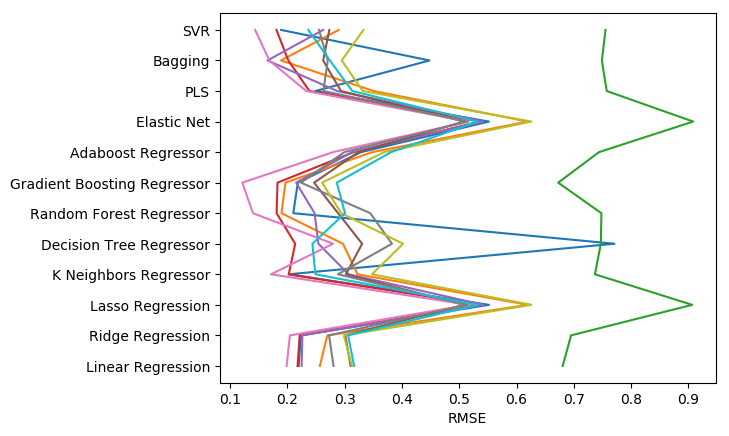

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcdefaults()
for i in range(1,11):
    plt.plot(cvrm['Fold_'+str(i)], m)
plt.xlabel('RMSE')
plt.show()

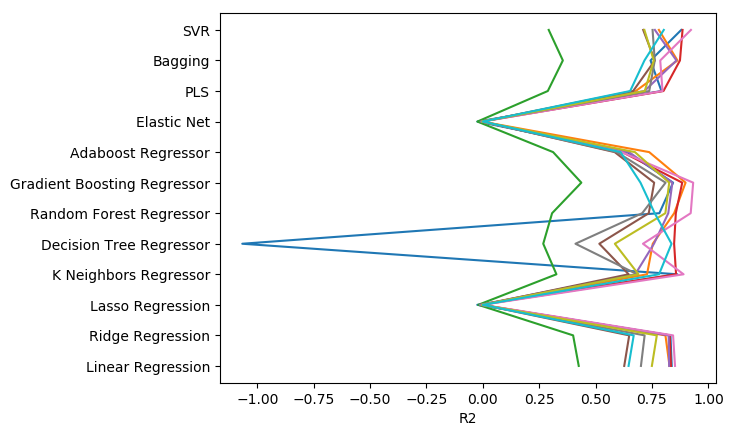

In [26]:
mpl.rcdefaults()
for i in range(1,11):
    plt.plot(cvr2['Fold_'+str(i)], m)
plt.xlabel('R2')
plt.show()

# 6. Extracting Outlier (k fold의 치우침을 바탕으로 판단)

In [27]:
Model2 = []
RMSE2 = []
R_sq2 = []
cv2 = KFold(100, random_state = 3)

def input_scores2(name, model, x1, y1):
    Model2.append(name)
    RMSE2.append(np.sqrt((-1) * cross_val_score(model, x1, y1, cv=cv2, 
                                               scoring='neg_mean_squared_error')))
    R_sq2.append(cross_val_score(model, x1, y1, cv=cv2, scoring='r2'))


In [28]:
names2 = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor', 'Elastic Net', 'PLS', 'Bagging', 'SVR']
models2 = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor(), ElasticNet(), PLSRegression(), BaggingRegressor(), SVR()]

#Running all algorithms
for name, model in zip(names2, models2):
    input_scores2(name, model, x_train1, y_train1)

C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

C:\usr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma w

C:\usr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma w

C:\usr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma w

C:\usr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma w

C:\usr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma w

In [29]:
evaluation2 = pd.DataFrame({'Model': Model2,
                           'RMSE': RMSE2,
                           'R Squared': R_sq2})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation2

FOLLOWING ARE THE TRAINING SCORES: 


,Model,RMSE,R Squared
0,Linear Regression,"[0.12175207190706287, 0.23833051131796074, 0.4...","[0.7824037165011122, 0.9105146837276433, 0.674..."
1,Ridge Regression,"[0.10823342902166827, 0.23852988510092576, 0.4...","[0.8280423156501107, 0.9103649044289595, 0.651..."
2,Lasso Regression,"[0.3430206974290354, 0.8489952201626332, 0.829...","[-0.727187171208644, -0.1355414150330152, -0.2..."
3,K Neighbors Regressor,"[0.12839751438982816, 0.12768962592698868, 0.3...","[0.7580018838252145, 0.9743135718479515, 0.751..."
4,Decision Tree Regressor,"[0.11098225384049713, 2.327767784125444, 0.477...","[0.8658573454667422, -7.525819460598974, 0.747..."
5,Random Forest Regressor,"[0.15947243696730865, 0.5242455373389963, 0.41...","[0.7441038826531905, 0.5435997865706623, 0.625..."
6,Gradient Boosting Regressor,"[0.08361141520909474, 0.3231134518612043, 0.38...","[0.8973804983822384, 0.8355239885421762, 0.738..."
7,Adaboost Regressor,"[0.33318238901425234, 0.2453834043115324, 0.51...","[-0.5159226837938731, 0.8778146718699801, 0.58..."
8,Elastic Net,"[0.3430206974290354, 0.8489952201626332, 0.829...","[-0.727187171208644, -0.1355414150330152, -0.2..."
9,PLS,"[0.10936215660516342, 0.1964479272462028, 0.50...","[0.8244370441847488, 0.9392022664609849, 0.546..."


In [30]:
ar22=[evaluation2.loc[i, 'R Squared'] for i in range(0,12)]
ar22

[array([ 0.78240372,  0.91051468,  0.67475586,  0.9061248 ,  0.89664072,
         0.69132249,  0.26767306,  0.83876762,  0.84191657,  0.64221784,
         0.7910636 ,  0.74554869,  0.91064289,  0.74069379,  0.91427013,
         0.49006079,  0.55115396,  0.24501799,  0.89295043,  0.90251945,
         0.43125283,  0.84369921,  0.60736199,  0.46869569,  0.98013091,
         0.81748247, -1.77817724,  0.91953581,  0.48370453,  0.01520407,
         0.59290808,  0.00844217,  0.91391873,  0.82038911,  0.91583794,
         0.85718334,  0.6742824 ,  0.76734971,  0.03286381,  0.74492154,
         0.90802864,  0.76467234,  0.88348535,  0.87338772,  0.32198047,
         0.4002085 ,  0.8959251 ,  0.87101293,  0.78610427,  0.87294698,
         0.81753691,  0.87206814,  0.48021087,  0.50589338, -0.25570291,
         0.84953454,  0.75746703,  0.06928117,  0.74293436,  0.9273537 ,
        -0.2626573 ,  0.92989367,  0.92980386,  0.93551806,  0.69833025,
         0.94757114,  0.69108142,  0.75828255,  0.7

In [31]:
arm2=[evaluation2.loc[i, 'RMSE'] for i in range(0,12)]
arm2

[array([0.12175207, 0.23833051, 0.43020441, 0.20222879, 0.06968776,
        0.26803992, 0.15842412, 0.09789108, 0.19609171, 0.18706075,
        0.47105836, 0.21091029, 0.24182139, 0.22523756, 0.15323404,
        0.19602498, 0.1801997 , 0.33271131, 0.16711383, 0.2814408 ,
        0.41212284, 0.12120261, 0.15242644, 0.52650922, 0.12328528,
        0.08904041, 0.4217451 , 0.13834274, 0.23569792, 1.93752576,
        0.20206015, 0.31325282, 0.18534344, 0.2228923 , 0.20783568,
        0.16411559, 0.31652151, 0.13966316, 0.16864875, 0.21632498,
        0.14492154, 0.15334807, 0.14641323, 0.21307312, 0.22213741,
        0.27935121, 0.27334393, 0.18850539, 0.30111303, 0.23574401,
        0.17652732, 0.12173079, 0.20783093, 0.26605843, 0.40081883,
        0.1819006 , 0.16349019, 0.59911211, 0.35081253, 0.13459758,
        0.29610596, 0.12369843, 0.20606221, 0.11511055, 0.30076567,
        0.15164982, 0.15822546, 0.16918126, 0.16231485, 0.47089196,
        0.19330724, 0.24322576, 0.31465041, 0.26

In [32]:
from pandas import DataFrame
cvr22=DataFrame(ar22, columns=['Fold_' +str(i) for i in range(1,101)])
cvr22

,Fold_1,Fold_2,Fold_3,Fold_4,Fold_5,Fold_6,Fold_7,Fold_8,Fold_9,Fold_10,...,Fold_91,Fold_92,Fold_93,Fold_94,Fold_95,Fold_96,Fold_97,Fold_98,Fold_99,Fold_100
0,0.782404,0.910515,0.674756,0.906125,0.896641,0.691322,0.267673,0.838768,0.841917,0.642218,...,0.201464,0.764792,0.808860,0.761404,0.057654,0.928535,-0.318900,0.565499,0.700455,0.729252
1,0.828042,0.910365,0.651468,0.898163,0.906293,0.682357,0.467991,0.826587,0.832456,0.609686,...,0.226623,0.807267,0.851823,0.755997,-0.012677,0.928524,-0.095762,0.561786,0.676791,0.767001
2,-0.727187,-0.135541,-0.210309,-0.002088,-0.840995,-0.015390,-1.926311,-1.300561,-0.134199,-1.035249,...,-0.164359,-0.060930,-0.035090,-0.129948,-0.672501,-0.035722,-0.076612,-0.069601,-0.001095,-0.094151
3,0.758002,0.974314,0.751319,0.971056,0.924468,0.738647,0.752527,0.757691,0.841438,0.554728,...,0.607102,0.885119,0.904523,0.794959,0.139549,0.919997,0.687285,0.697884,0.718606,0.761743
4,0.865857,-7.525819,0.747987,0.946409,0.587150,0.867716,0.917017,-0.878456,0.943439,0.620685,...,0.208801,0.953754,0.681196,-0.671162,0.038984,0.935886,0.533273,0.665390,0.895878,0.653198
5,0.744104,0.543600,0.625258,0.975702,0.844553,0.827454,-0.017053,-0.081818,0.854219,0.777355,...,0.308852,0.878250,0.574521,0.598005,-1.404198,0.696532,0.661413,0.707221,0.927089,0.532798
6,0.897380,0.835524,0.738797,0.980763,0.641792,0.814983,0.893409,0.603146,0.870462,0.784595,...,0.749443,0.925174,0.682840,0.752057,-22.605053,0.813993,0.840792,0.649767,0.839017,0.890919
7,-0.515923,0.877815,0.587000,0.843577,-0.723109,0.788192,-1.660203,-2.143343,0.748805,-0.565805,...,0.342718,0.724812,0.062892,0.221894,-6.837375,0.637747,0.378999,0.632603,0.452757,0.344675
8,-0.727187,-0.135541,-0.210309,-0.002088,-0.841112,-0.015390,-1.926311,-1.300561,-0.134199,-1.035249,...,-0.165978,-0.060930,-0.040142,-0.129948,-0.673521,-0.035722,-0.076612,-0.069601,-0.001095,-0.094151
9,0.824437,0.939202,0.546509,0.878673,0.766952,0.630685,0.067954,0.559918,0.811796,0.515256,...,0.345863,0.906112,0.595507,0.530759,-0.841674,0.862441,0.667365,0.567051,0.445878,0.834012


In [33]:
cvrm2=DataFrame(arm2, columns=['Fold_' +str(i) for i in range(1,101)])
cvrm2

,Fold_1,Fold_2,Fold_3,Fold_4,Fold_5,Fold_6,Fold_7,Fold_8,Fold_9,Fold_10,...,Fold_91,Fold_92,Fold_93,Fold_94,Fold_95,Fold_96,Fold_97,Fold_98,Fold_99,Fold_100
0,0.121752,0.238331,0.430204,0.202229,0.069688,0.268040,0.158424,0.097891,0.196092,0.187061,...,0.281974,0.248442,0.162997,0.244968,0.156866,0.171133,0.405700,0.657956,0.199842,0.206430
1,0.108233,0.238530,0.445340,0.210630,0.066354,0.271905,0.135029,0.101521,0.201874,0.195380,...,0.277496,0.224893,0.143514,0.247728,0.162614,0.171146,0.369792,0.660762,0.207586,0.191499
2,0.343021,0.848995,0.829886,0.660725,0.294109,0.486142,0.316686,0.369772,0.525244,0.446151,...,0.340490,0.527645,0.379309,0.533098,0.208981,0.651492,0.366546,1.032316,0.365336,0.414982
3,0.128398,0.127690,0.376177,0.112292,0.059573,0.246638,0.092094,0.120006,0.196388,0.208683,...,0.197789,0.173629,0.115200,0.227090,0.149895,0.181067,0.197548,0.548641,0.193692,0.193648
4,0.110982,2.327768,0.477151,0.150385,0.140208,0.467881,0.059922,0.334132,0.117294,0.194467,...,0.281765,0.103671,0.210671,0.102219,0.169335,0.161086,0.241505,0.446872,0.117822,0.224677
5,0.159472,0.524246,0.417318,0.097881,0.419680,0.258537,0.095220,0.203436,0.154706,0.137715,...,0.225750,0.181786,0.204519,0.070894,0.195117,0.268601,0.221621,0.561019,0.122789,0.284538
6,0.083611,0.323113,0.385531,0.091545,0.216968,0.207516,0.060441,0.153579,0.177507,0.152314,...,0.157948,0.140128,0.201230,0.249720,0.785102,0.291914,0.140955,0.590718,0.146502,0.131028
7,0.333182,0.245383,0.517060,0.314373,0.256007,0.291423,0.311275,0.401126,0.234014,0.308921,...,0.270862,0.261896,0.257404,0.398038,0.377695,0.402878,0.284682,0.590474,0.308559,0.332459
8,0.343021,0.848995,0.829886,0.660725,0.294118,0.486142,0.316686,0.369772,0.525244,0.446151,...,0.340727,0.527645,0.380233,0.533098,0.209045,0.651492,0.366546,1.032316,0.365336,0.414982
9,0.109362,0.196448,0.507989,0.229904,0.104642,0.293187,0.178726,0.161728,0.213959,0.217736,...,0.255209,0.156965,0.237115,0.343539,0.219296,0.237428,0.203743,0.656780,0.271805,0.161632


In [34]:
m2=evaluation2['Model'].ravel()
m2

array(['Linear Regression', 'Ridge Regression', 'Lasso Regression',
       'K Neighbors Regressor', 'Decision Tree Regressor',
       'Random Forest Regressor', 'Gradient Boosting Regressor',
       'Adaboost Regressor', 'Elastic Net', 'PLS', 'Bagging', 'SVR'],
      dtype=object)

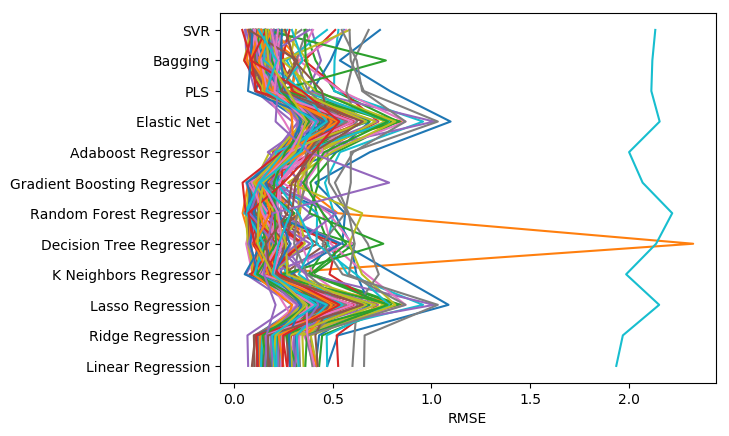

In [35]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcdefaults()
for i in range(1,101):
    plt.plot(cvrm2['Fold_'+str(i)], m2)
plt.xlabel('RMSE')
plt.show()

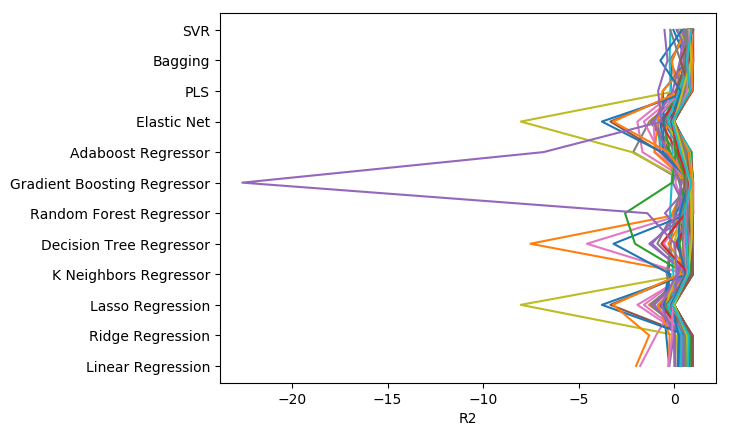

In [36]:
mpl.rcdefaults()
for i in range(1,101):
    plt.plot(cvr22['Fold_'+str(i)], m2)
plt.xlabel('R2')
plt.show()

## 시험삼아 k를 늘려가면서 rmse와 r2를 도출해보면 하나의 fold만이 치우치고, fold간의 차이가 점점 넓어진다. 따라서 치우친 한 fold 안에 들어가는 y의 값들(k=100의 경우 7개 정도) 안에서 치우친 값이 있음을 의심할 수 있다.

## 엑셀을 통하여 자료를 직접 살펴보면 668번째(python식으로 667번째) y가 22로 아주 작았다. 이 지점에서 y의 outlier에 대한 의문이 생기고 이는 발표 이후 심화학습에서 좀 더 살펴볼 것이다. 일단 이 값을 제거 하고 새롭게 df2를 정의하여 x2와 y2를 지정해보자.

## df2는 668번째 자료를 제거한 df

In [37]:
df1.shape

(731, 12)

In [38]:
df2=df1[df1.cnt != 22]
df2.shape

(730, 12)

In [39]:
x2 = df2.loc[:, df2.columns != 'cnt']
y2 = np.log(df2['cnt'])

In [40]:
x2.shape

(730, 11)

In [41]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, random_state=6, test_size=0.2)

In [42]:
Model2 = []
RMSE2 = []
R_sq2 = []
cv2 = KFold(10, random_state = 3)

#Creating a Function to append the cross validation scores of the algorithms
def input_scores2(name, model, x2, y2):
    Model2.append(name)
    RMSE2.append(np.sqrt((-1) * cross_val_score(model, x2, y2, cv=cv2, 
                                               scoring='neg_mean_squared_error')))
    R_sq2.append(cross_val_score(model, x2, y2, cv=cv2, scoring='r2'))


In [43]:
names2 = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor', 'Elastic Net', 'PLS', 'Bagging', 'SVR']
models2 = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor(), ElasticNet(), PLSRegression(), BaggingRegressor(), SVR()]

#Running all algorithms
for name, model in zip(names2, models2):
    input_scores2(name, model, x_train2, y_train2)

C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\usr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

In [44]:
evaluation2 = pd.DataFrame({'Model': Model2,
                           'RMSE': RMSE2,
                           'R Squared': R_sq2})
ar22=[evaluation2.loc[i, 'R Squared'] for i in range(0,12)]
arm2=[evaluation2.loc[i, 'RMSE'] for i in range(0,12)]
cvr22=DataFrame(ar22, columns=['Fold_' +str(i) for i in range(1,11)])
cvrm2=DataFrame(arm2, columns=['Fold_' +str(i) for i in range(1,11)])
m2=evaluation2['Model'].ravel()

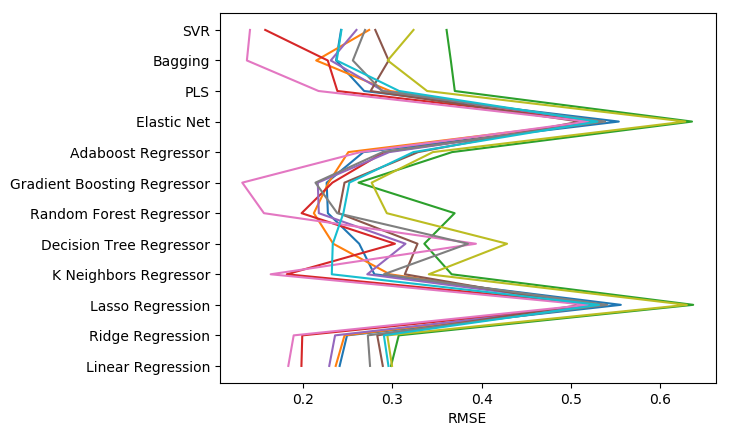

In [45]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcdefaults()
for i in range(1,11):
    plt.plot(cvrm2['Fold_'+str(i)], m2)
plt.xlabel('RMSE')
plt.show()

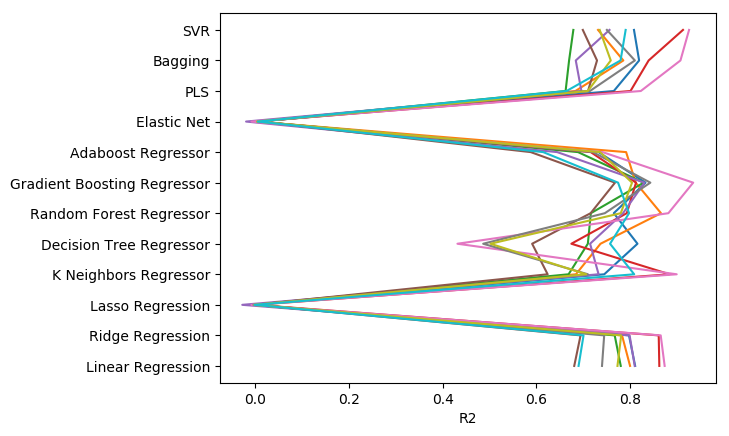

In [46]:
mpl.rcdefaults()
for i in range(1,11):
    plt.plot(cvr22['Fold_'+str(i)], m2)
plt.xlabel('R2')
plt.show()

# 7. Finding Best (Hyper)Parameter

## 1) Ridge Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.001,0.01,0.1,0,1]}
rid = GridSearchCV(Ridge(), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv,n_jobs=None).fit(x_train2, y_train2)
print(rid.best_estimator_) 
print("R Squared:",rid.best_score_)

## 2) Lasso

In [ ]:
param_grid = {'alpha':[0.001,0.01,0.1,1]}
las = GridSearchCV(Lasso(), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv,n_jobs=None).fit(x_train2, y_train2)
print(las.best_estimator_) 
print("R Squared:",las.best_score_)

## 3) K Neighbors

In [ ]:
param_grid = {'n_neighbors': range(5,15),
              'leaf_size': range(30,100)}
knb = GridSearchCV(KNeighborsRegressor(), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv).fit(x_train2, y_train2)
print(knb.best_estimator_) 
print("R Squared:", knb.best_score_)

## 4) Decision Tree

In [ ]:
param_grid = {"max_features": ['auto','sqrt','log2'],
             "min_weight_fraction_leaf": (0,0.5),
             "min_samples_leaf":(2,10),
             "random_state":[1]}
dct = GridSearchCV(DecisionTreeRegressor(), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv).fit(x_train2, y_train2)
print(dct.best_estimator_) 
print("R Squared:", dct.best_score_)

## 5) Random Forest

In [121]:
param_grid = {'n_estimators':range(1,300,10),
             'max_features': ['auto','sqrt','log2']}

rdf = GridSearchCV(RandomForestRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv).fit(x_train2, y_train2)
print(rdf.best_estimator_) 
print("R Squared:",rdf.best_score_)

C:\usr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=251, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)
R Squared: 0.8186455476637273


## 6) Gradient Boost

In [ ]:
param_grid = {'n_estimators':range(20,100,10),
              'max_depth':[10], #range(5,16,2), 
              'min_samples_split':[100], #range(200,1001,200), 
              'learning_rate':[0.2]}
grd = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv).fit(x_train2, y_train2)
print(grd.best_estimator_) 
print("R Squared:",grd.best_score_)

## 7) Adaboost

In [ ]:
param_grid = {'learning_rate': [0.1,1.0],
              'loss':['linear','square','exponential']}
ada = GridSearchCV(AdaBoostRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv).fit(x_train2, y_train2)
print(ada.best_estimator_) 
print("R Squared:",ada.best_score_)

## 8) Elastic Net

In [ ]:
param_grid = {'alpha':np.linspace(0.001,1.0,100),
              'max_iter':[1000],
             'l1_ratio': np.linspace(0.1,1.0,10)}
eln = GridSearchCV(ElasticNet(), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv,n_jobs=None).fit(x_train2, y_train2)
print(eln.best_estimator_) 
print("R Squared:",eln.best_score_)

## 9) PLS

In [ ]:
param_grid = {'n_components':range(2,10)}
pls = GridSearchCV(PLSRegression(), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv,n_jobs=None).fit(x_train2, y_train2)
print(pls.best_estimator_) 
print("R Squared:",pls.best_score_)

## 10) Bagging

In [ ]:
param_grid = {'max_samples':np.linspace(0.1,1.0,10),
              'max_features':np.linspace(0.1,1.0,10)}
bag = GridSearchCV(BaggingRegressor(), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv,n_jobs=None).fit(x_train2, y_train2)
print(bag.best_estimator_) 
print("R Squared:",bag.best_score_)

## 11) SVM

In [ ]:
param_grid = {'kernel': ('linear', 'rbf','poly'), 
              'C':[1.5, 10],'gamma': [1e-7, 1e-4],
              'epsilon':[0.1,0.2,0.5,0.3]
              }
svm = GridSearchCV(SVR(), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv,n_jobs=None).fit(x_train2, y_train2)
print(svm.best_estimator_) 
print("R Squared:",svm.best_score_)

In [47]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

Model3 = []
RMSE3 = []
R_sq3 = []
cv3 = KFold(10, random_state = 3)

def input_scores3(name, model, x, y):
    Model3.append(name)
    RMSE3.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv3, 
                                               scoring='neg_mean_squared_error')))
    R_sq3.append(cross_val_score(model, x, y, cv=cv3, scoring='r2'))

In [48]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVR

names3 = ['Random Forest Regressor',
         'Gradient Boosting Regressor',
         'Bagging',
         'Elastic Net',
         'SVR',
         'Linear Regression', 
         'Ridge Regression',
         'Lasso Regression',
         'PLS',
         'K Neighbors Regressor',
         'Adaboost Regressor', 
         'Decision Tree Regressor']
models3 = [RandomForestRegressor(n_estimators=100),
          GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=10, min_impurity_decrease=0.0, min_samples_leaf=1,
             min_samples_split=100, min_weight_fraction_leaf=0.0,
             n_estimators=60, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False),
          BaggingRegressor(base_estimator=None, bootstrap=True,bootstrap_features=False, max_features=1.0, max_samples=0.4,n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
                           verbose=0, warm_start=False),
          ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True,
                          l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
                          precompute=False, random_state=None, selection='cyclic', tol=0.0001,
                          warm_start=False),
          SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma=1e-07,
                          kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
          LinearRegression(),
          Ridge(alpha=0.1),
          Lasso(alpha=0.005),
          PLSRegression(copy=True, max_iter=500, n_components=9, scale=True, tol=1e-06),
          KNeighborsRegressor(algorithm='auto', leaf_size=2, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=4, p=1, weights='uniform'), 
          AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='linear', n_estimators=65, random_state=6),
          DecisionTreeRegressor(max_depth=8, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=10)]

for name, model in zip(names3, models3):
    input_scores3(name, model, x_train2, y_train2)

In [49]:
evaluation3 = pd.DataFrame({'Model': Model3,
                           'RMSE': RMSE3,
                           'R Squared': R_sq3})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation3

FOLLOWING ARE THE TRAINING SCORES: 


,Model,RMSE,R Squared
0,Random Forest Regressor,"[0.24047570122341333, 0.2114864187974785, 0.34...","[0.8231138057383903, 0.8281603070885142, 0.690..."
1,Gradient Boosting Regressor,"[0.21927078861724156, 0.23603196059998977, 0.3...","[0.8434282266845597, 0.800891005603648, 0.7340..."
2,Bagging,"[0.24455006303550403, 0.22242783111488645, 0.3...","[0.8147657426537613, 0.7575934708308663, 0.697..."
3,Elastic Net,"[0.24519371764104902, 0.2419769249000372, 0.30...","[0.8042189784640642, 0.7907347301332375, 0.773..."
4,SVR,"[0.2469257743228889, 0.2426075734174602, 0.311...","[0.801443201415369, 0.789642520135998, 0.76092..."
5,Linear Regression,"[0.2409427141088108, 0.2365278050577401, 0.298...","[0.8109487690147017, 0.8000535699305873, 0.780..."
6,Ridge Regression,"[0.24175414777614115, 0.23755225169235963, 0.2...","[0.8096732721019788, 0.7983178075267171, 0.779..."
7,Lasso Regression,"[0.2738529380691368, 0.27522553465381594, 0.35...","[0.755776909546024, 0.7292760366926582, 0.6853..."
8,PLS,"[0.2459992550122329, 0.23903948563643082, 0.29...","[0.8029304626546336, 0.7957845750394066, 0.786..."
9,K Neighbors Regressor,"[0.28423779484958017, 0.27613155382930565, 0.3...","[0.7369032013650569, 0.7274907021694762, 0.621..."


In [50]:
ar23=[evaluation3.loc[i, 'R Squared'] for i in range(0,12)]
ar23

[array([0.82311381, 0.82816031, 0.69020291, 0.84376464, 0.78943981,
        0.74643152, 0.92550995, 0.81304596, 0.78362893, 0.80196279]),
 array([0.84342823, 0.80089101, 0.73403489, 0.86263151, 0.79898377,
        0.75133961, 0.90505388, 0.81197418, 0.80560519, 0.78975279]),
 array([0.81476574, 0.75759347, 0.69769585, 0.85081862, 0.75511522,
        0.75003462, 0.90762515, 0.84484194, 0.71868268, 0.8000486 ]),
 array([0.80421898, 0.79073473, 0.77321862, 0.86228325, 0.80476001,
        0.6897954 , 0.86947202, 0.7435377 , 0.77880554, 0.69702808]),
 array([0.8014432 , 0.78964252, 0.76092631, 0.85826609, 0.79449911,
        0.69538181, 0.87304584, 0.73623956, 0.77160723, 0.69871841]),
 array([0.81094877, 0.80005357, 0.78019904, 0.86250475, 0.81003235,
        0.68092713, 0.87387306, 0.74020371, 0.77320091, 0.69019952]),
 array([0.80967327, 0.79831781, 0.77915431, 0.86257527, 0.80929885,
        0.68278412, 0.87314237, 0.74117789, 0.77461211, 0.69174197]),
 array([0.75577691, 0.72927604, 0.

In [51]:
arm3=[evaluation3.loc[i, 'RMSE'] for i in range(0,12)]
arm3

[array([0.2404757 , 0.21148642, 0.34215859, 0.21384421, 0.23637267,
        0.25285012, 0.14974424, 0.23888444, 0.2959555 , 0.23090941]),
 array([0.21927079, 0.23603196, 0.32832257, 0.19807514, 0.23588154,
        0.25533867, 0.15918303, 0.23392155, 0.27735353, 0.24348854]),
 array([0.24455006, 0.22242783, 0.3530205 , 0.18858982, 0.26727623,
        0.25913699, 0.13591549, 0.21972123, 0.32056843, 0.22106264]),
 array([0.24519372, 0.24197692, 0.30317411, 0.19832606, 0.23246779,
        0.28519204, 0.18664225, 0.27319532, 0.29585471, 0.29229043]),
 array([0.24692577, 0.24260757, 0.31128221, 0.20119783, 0.23849829,
        0.28261239, 0.18406941, 0.27705521, 0.30063016, 0.29147393]),
 array([0.24094271, 0.23652781, 0.29847173, 0.19816651, 0.22930748,
        0.28923991, 0.18346874, 0.27496535, 0.29957945, 0.29556599]),
 array([0.24175415, 0.23755225, 0.29918021, 0.19811568, 0.22974976,
        0.288397  , 0.18399942, 0.27444933, 0.29864597, 0.29482928]),
 array([0.27385294, 0.27522553, 0.

In [52]:
from pandas import DataFrame
cvr23=DataFrame(ar23, columns=['Fold_' +str(i) for i in range(1,11)])
cvr23

,Fold_1,Fold_2,Fold_3,Fold_4,Fold_5,Fold_6,Fold_7,Fold_8,Fold_9,Fold_10
0,0.823114,0.828160,0.690203,0.843765,0.789440,0.746432,0.925510,0.813046,0.783629,0.801963
1,0.843428,0.800891,0.734035,0.862632,0.798984,0.751340,0.905054,0.811974,0.805605,0.789753
2,0.814766,0.757593,0.697696,0.850819,0.755115,0.750035,0.907625,0.844842,0.718683,0.800049
3,0.804219,0.790735,0.773219,0.862283,0.804760,0.689795,0.869472,0.743538,0.778806,0.697028
4,0.801443,0.789643,0.760926,0.858266,0.794499,0.695382,0.873046,0.736240,0.771607,0.698718
5,0.810949,0.800054,0.780199,0.862505,0.810032,0.680927,0.873873,0.740204,0.773201,0.690200
6,0.809673,0.798318,0.779154,0.862575,0.809299,0.682784,0.873142,0.741178,0.774612,0.691742
7,0.755777,0.729276,0.685343,0.852669,0.739303,0.705206,0.825619,0.710650,0.759034,0.708045
8,0.802930,0.795785,0.786086,0.863551,0.808603,0.676823,0.873138,0.742399,0.774025,0.695293
9,0.736903,0.727491,0.621676,0.877625,0.758911,0.640059,0.883668,0.762716,0.716008,0.805166


In [53]:
cvrm3=DataFrame(arm3, columns=['Fold_' +str(i) for i in range(1,11)])
cvrm3

,Fold_1,Fold_2,Fold_3,Fold_4,Fold_5,Fold_6,Fold_7,Fold_8,Fold_9,Fold_10
0,0.240476,0.211486,0.342159,0.213844,0.236373,0.252850,0.149744,0.238884,0.295956,0.230909
1,0.219271,0.236032,0.328323,0.198075,0.235882,0.255339,0.159183,0.233922,0.277354,0.243489
2,0.244550,0.222428,0.353021,0.188590,0.267276,0.259137,0.135915,0.219721,0.320568,0.221063
3,0.245194,0.241977,0.303174,0.198326,0.232468,0.285192,0.186642,0.273195,0.295855,0.292290
4,0.246926,0.242608,0.311282,0.201198,0.238498,0.282612,0.184069,0.277055,0.300630,0.291474
5,0.240943,0.236528,0.298472,0.198167,0.229307,0.289240,0.183469,0.274965,0.299579,0.295566
6,0.241754,0.237552,0.299180,0.198116,0.229750,0.288397,0.183999,0.274449,0.298646,0.294829
7,0.273853,0.275226,0.357114,0.205132,0.268625,0.278018,0.215729,0.290184,0.308795,0.286927
8,0.245999,0.239039,0.294448,0.197411,0.230169,0.291094,0.184003,0.273801,0.299034,0.293126
9,0.284238,0.276132,0.391580,0.186953,0.258326,0.307206,0.176201,0.262782,0.335231,0.234394


In [54]:
m3=evaluation3['Model'].ravel()
m3

array(['Random Forest Regressor', 'Gradient Boosting Regressor',
       'Bagging', 'Elastic Net', 'SVR', 'Linear Regression',
       'Ridge Regression', 'Lasso Regression', 'PLS',
       'K Neighbors Regressor', 'Adaboost Regressor',
       'Decision Tree Regressor'], dtype=object)

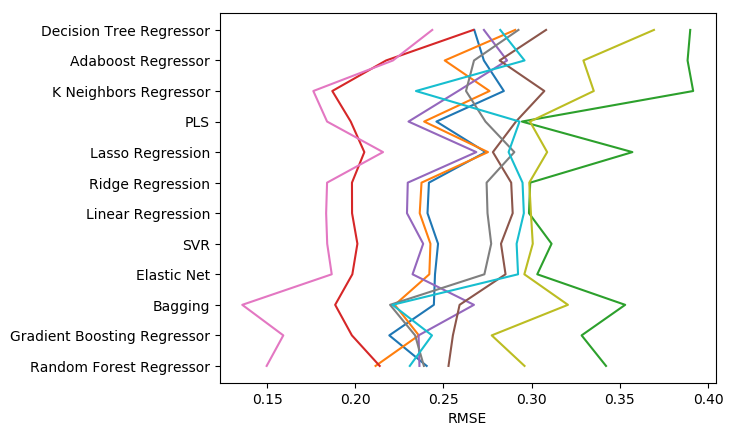

In [55]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcdefaults()
for i in range(1,11):
    plt.plot(cvrm3['Fold_'+str(i)], m3)

plt.xlabel('RMSE')
plt.show()

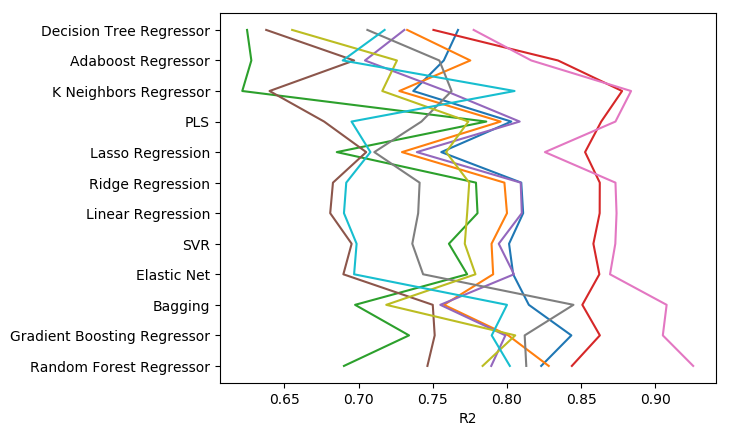

In [56]:
mpl.rcdefaults()
for i in range(1,11):
    plt.plot(cvr23['Fold_'+str(i)], m3)

plt.xlabel('R2')
plt.show()

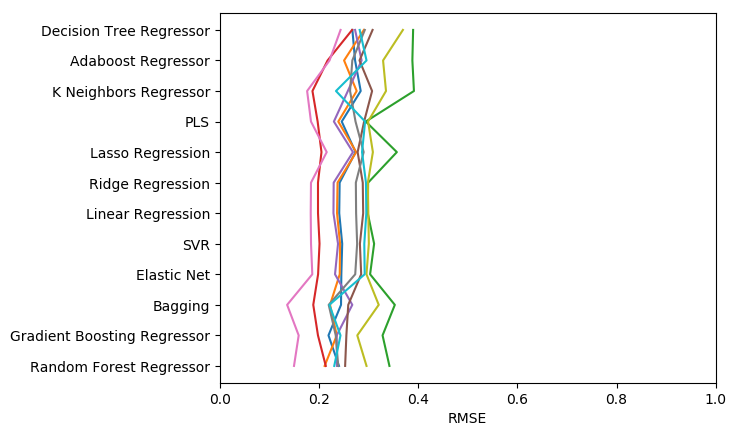

In [57]:
mpl.rcdefaults()
for i in range(1,11):
    plt.plot(cvrm3['Fold_'+str(i)], m3)

ax = plt.gca()
ax.set_xlim([0, 1])    
    
plt.xlabel('RMSE')
plt.show()

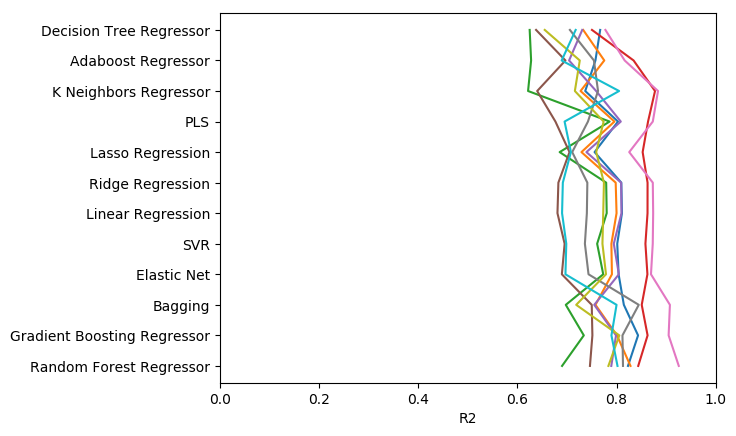

In [58]:
mpl.rcdefaults()
for i in range(1,11):
    plt.plot(cvr23['Fold_'+str(i)], m3)

ax = plt.gca()
ax.set_xlim([0, 1])        
    
plt.xlabel('R2')
plt.show()

# 8. Predict

In [59]:
grd = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=10,min_impurity_decrease=0.0,min_samples_leaf=1,
             min_samples_split=100, min_weight_fraction_leaf=0.0,
             n_estimators=60, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False)

grd.fit(x_train2, y_train2)
y_pred = grd.predict(x_test2)

print('R-squared for Test: %.2f' %grd.score(x_test2, y_test2))

score = mean_squared_error(y_test2, y_pred)
score = np.sqrt(score)
print("Root Mean Squared Error = {:.5f}".format(score))

R-squared for Test: 0.82
Root Mean Squared Error = 0.22482


# 발표 후 피드백 반영 및 심화 학습

## 1. Outlier Y를 체크: Box plot, Z-score, q99

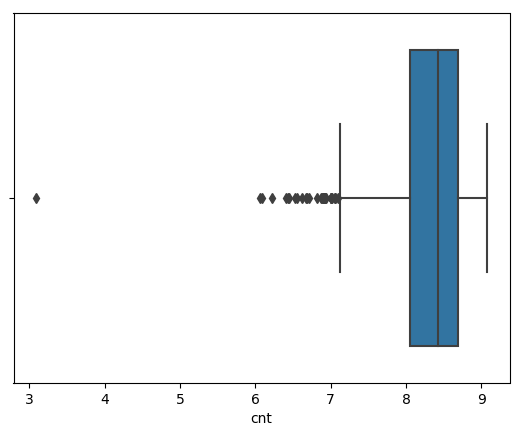

In [60]:
import seaborn as sns
sns.boxplot(y1)

### 먼저 Box Plot을 통하여 y의 분포를 대략적으로 확인할 수 있다. 이 데이터의 경우 분포에서 낮게 멀어진 y값들을 확인할 수 있다.

In [61]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(y1))
print(z)

[2.38560522e+00 2.74031483e+00 1.84615405e+00 1.59467187e+00
 1.55343975e+00 1.54701907e+00 1.65275053e+00 2.43149289e+00
 2.69592147e+00 1.88213359e+00 1.95915322e+00 2.10212617e+00
 1.77516225e+00 1.75695843e+00 1.97964797e+00 2.04121834e+00
 2.35967944e+00 3.01368987e+00 1.50065435e+00 1.23444446e+00
 1.61566563e+00 2.39258546e+00 2.38386459e+00 1.76300493e+00
 1.18357538e+00 3.52823525e+00 3.80343289e+00 2.09476081e+00
 2.19930701e+00 2.20243443e+00 1.66300530e+00 1.83222316e+00
 1.63466983e+00 1.60790116e+00 1.44139137e+00 2.35112386e+00
 1.52895657e+00 1.43737876e+00 1.63017927e+00 1.54808752e+00
 1.62123328e+00 1.40364530e+00 1.69647176e+00 1.56527379e+00
 1.24695257e+00 1.33716019e+00 1.07475805e+00 8.05123423e-01
 5.17387946e-01 1.51632012e+00 1.33999789e+00 2.18530374e+00
 1.72230290e+00 1.24336951e+00 1.34473785e+00 1.70933871e+00
 1.19745823e+00 8.56479932e-01 1.72704155e+00 1.30346895e+00
 1.05941673e+00 1.46464783e+00 1.21937765e+00 1.10585854e+00
 3.22170909e+00 1.284117

### y의 z-score을 살펴본 뒤, 특정 threshold이상의 값들을 제거할 수 있다.

In [62]:
threshold = 3
print(np.where(z > 3))

(array([ 17,  25,  26,  64,  68, 301, 667, 725], dtype=int64),)


### 특정 y값이 분포한 위치를 사용하여 특이값을 제거할 수도 있다.

C:\usr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


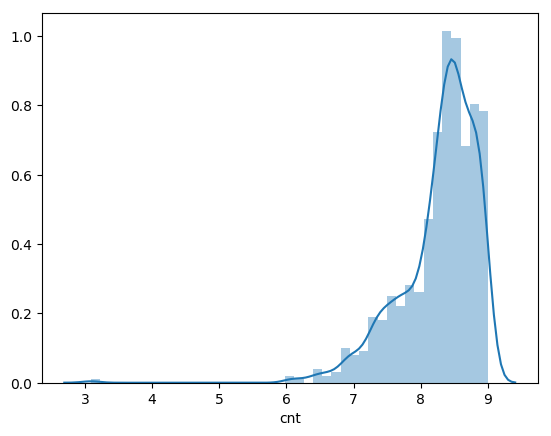

In [63]:
cnt1=y1.values
q99=np.percentile(cnt1,[99])


y99=y1[y1<q99[0]]
sns.distplot(y99)
plt.show()

In [64]:
df1.shape

(731, 12)

### Z score를 사용한 경과 threshold 3이상의 값들을 제거하여 모델을 돌려보자.

In [65]:
df1=df1.drop([17,25,26,64,68,301,667,725])
df1.shape

(723, 12)

In [66]:
import numpy as np
x1 = df1.loc[:, df1.columns != 'cnt']
y1 = np.log(df1['cnt'])

In [67]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, random_state=6, test_size=0.2)

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {'n_estimators':range(20,100,10),
              'max_depth':[10], 
              'min_samples_split':[100], 
              'learning_rate':[0.1]}
grd = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=10).fit(x_train1, y_train1)
print(grd.best_estimator_) 
print("R Squared:",grd.best_score_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=100, min_weight_fraction_leaf=0.0,
             n_estimators=70, n_iter_no_change=None, presort='auto',
             random_state=1, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
R Squared: 0.8419786793236198


C:\usr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [69]:
grd = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=100, min_weight_fraction_leaf=0.0,
             n_estimators=70, n_iter_no_change=None, presort='auto',
             random_state=1, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

grd.fit(x_train1, y_train1)
y_pred = grd.predict(x_test1)

print('R-squared for Test: %.2f' %grd.score(x_test1, y_test1))

score = mean_squared_error(y_test1, y_pred)
score = np.sqrt(score)
print("Root Mean Squared Error = {:.5f}".format(score))

R-squared for Test: 0.78
Root Mean Squared Error = 0.23975


### 앞서 668번째 y만 제거했을 경우 R-squared for Test: 0.82, Root Mean Squared Error = 0.22482였다. 너무 많은 범위의 y를 제거하여 오히려 예측력이 떨어진 것으로 보인다. 따라서 앞선 668번째 y만 제거한 df2가 보다 적합하다.

## 2. X변수의 중요도 체크: 각 변수별 box plot, correlation graph, Random Forest Feature Importances Check

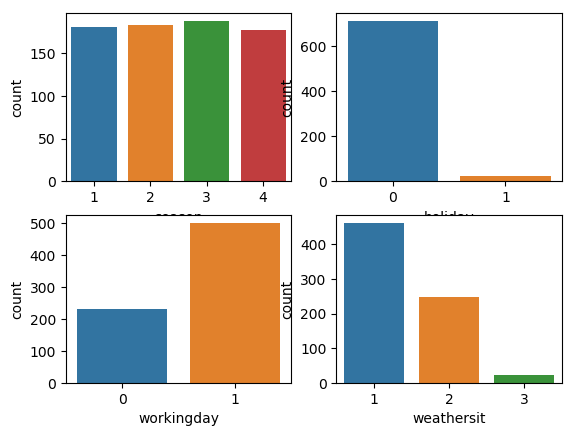

In [70]:
cat_names=['season', 'holiday', 'workingday', 'weathersit']

i=0
for name in cat_names:
    i=i+1
    plt.subplot(2,2,i)
    sns.countplot(name,data=df) 
    
plt.show()

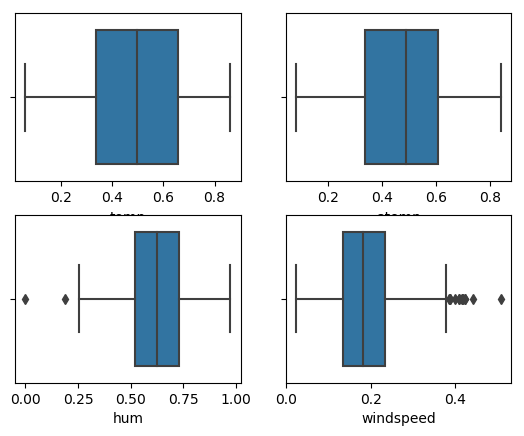

In [71]:
cont_names=['temp','atemp','hum','windspeed']

        
#sns.boxplot(train_df['season'])   
i=0
for name in cont_names:
    i=i+1
    plt.subplot(2,2,i)
    sns.boxplot(name,data=df) 
    
plt.show()

### 그림을 통한 추리
### 1) holiday와 workingdat의 상관관계 의심
### 2) season의 각 변수별로 큰 차이가 없어보인다.
### 3) hum과 windspeed에서 outliers가 다량 발견

C:\usr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


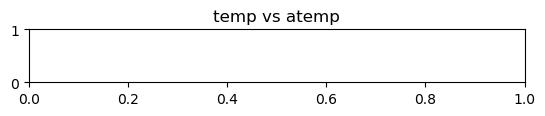

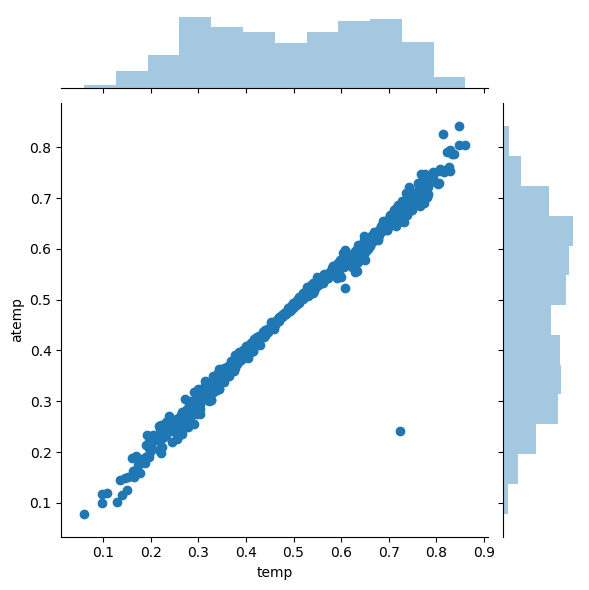

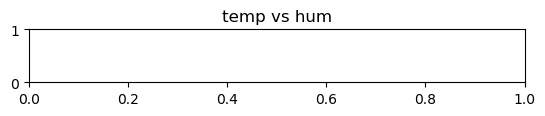

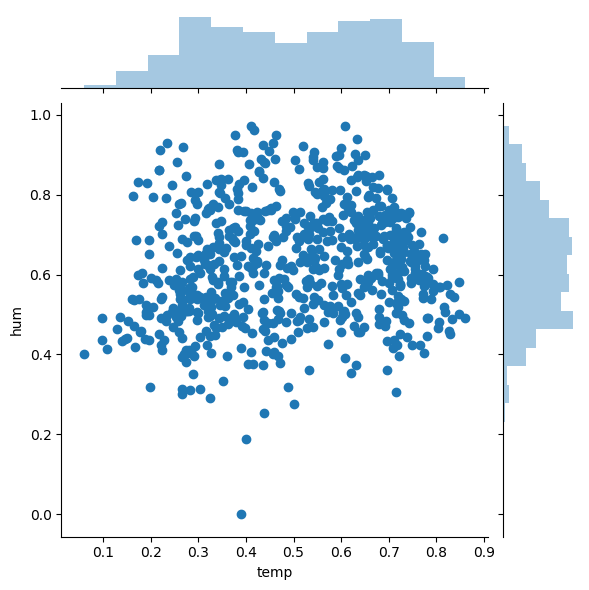

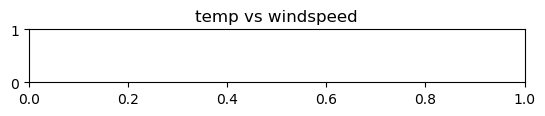

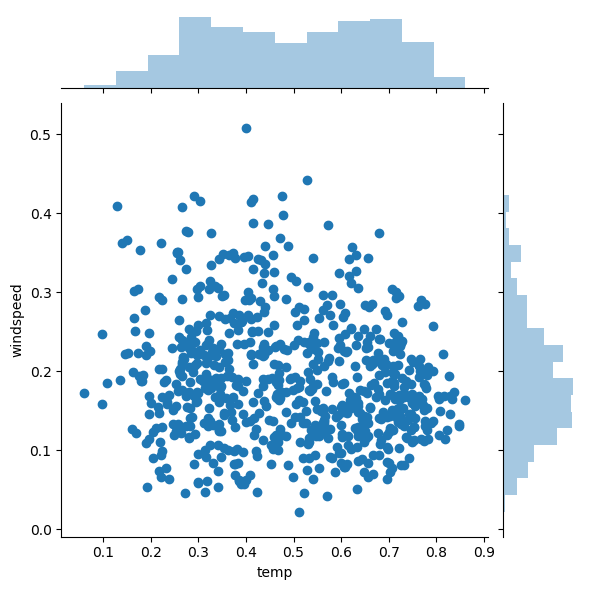

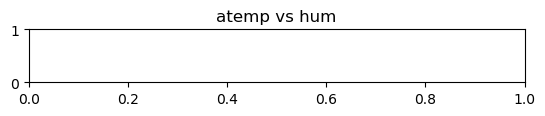

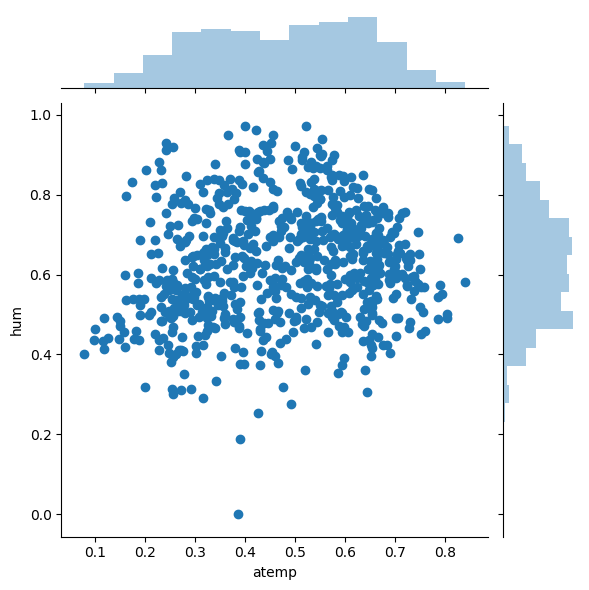

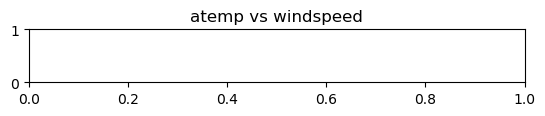

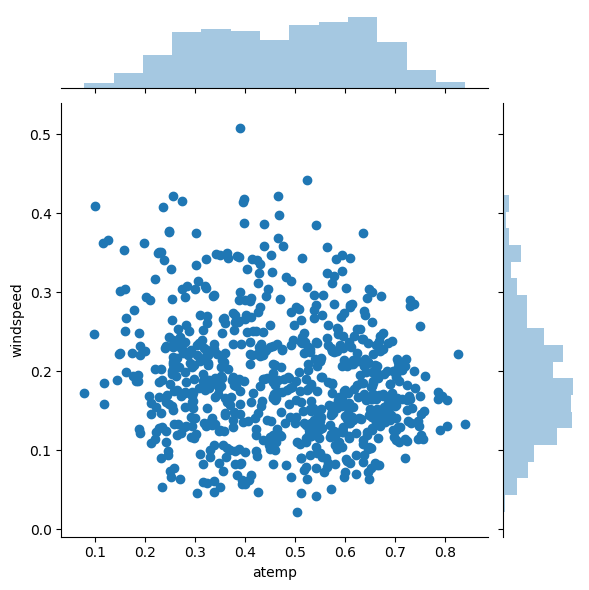

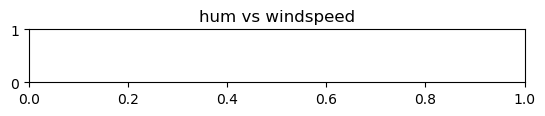

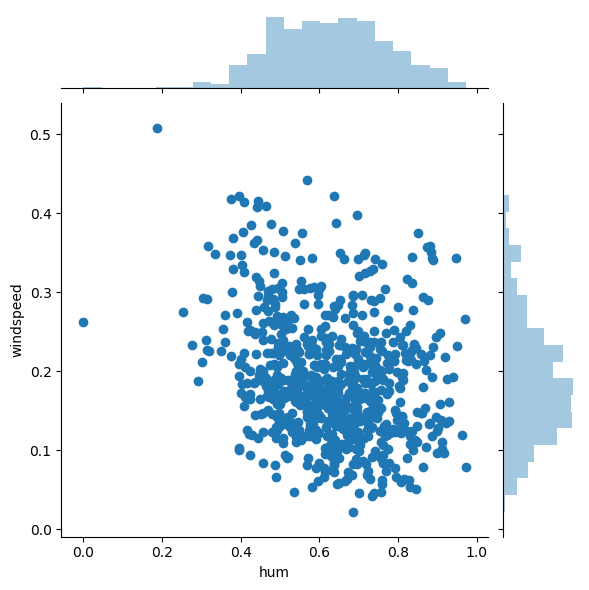

In [72]:
i=1
for name_1 in cont_names:
    j=cont_names.index(name_1)


    while(j<len(cont_names)-1):


        plt.subplot(6,1,i)
        plt.title(name_1+' vs '+cont_names[j+1])
        sns.jointplot(x=name_1,y=cont_names[j+1],data=df) 
        j=j+1
        i=i+1
        plt.show()

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rfModel = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=251, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False) 
rfModel.fit(X = x_train2,y = y_train2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=251, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [74]:
rfModel.feature_importances_

array([0.18457401, 0.11563405, 0.01663904, 0.27505125, 0.10059031,
       0.08529453, 0.15639041, 0.00754496, 0.01749994, 0.02494196,
       0.01583954])

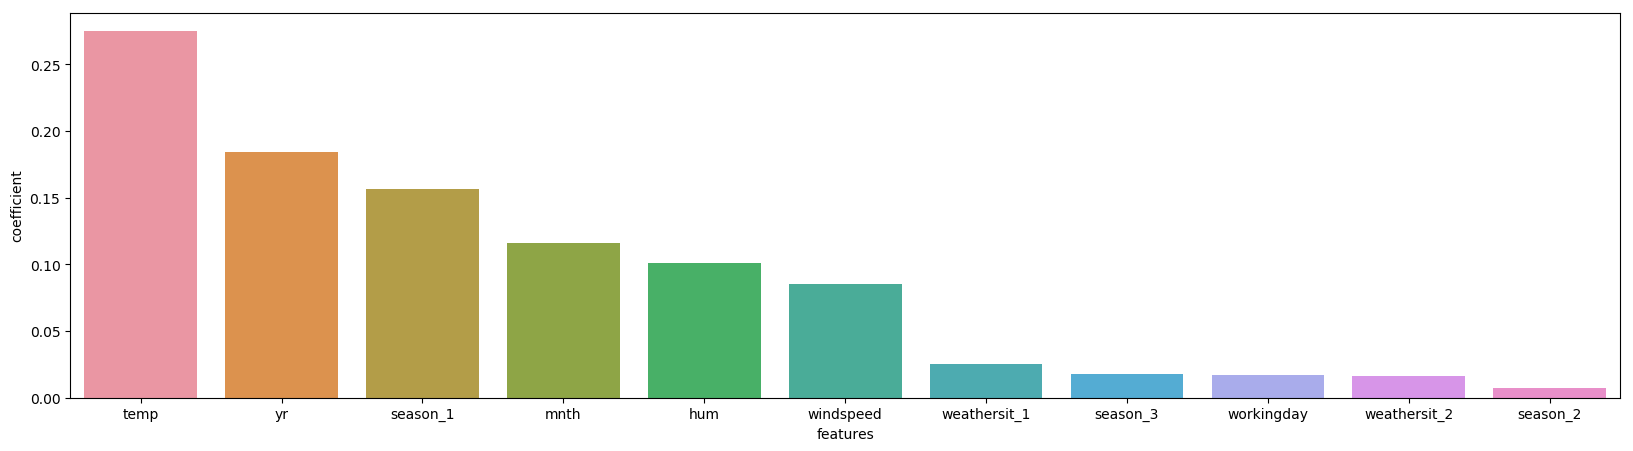

In [75]:
import seaborn as sn
features = pd.DataFrame()
features['features'] = x_train2.columns
features['coefficient'] = rfModel.feature_importances_
features.sort_values(by=['coefficient'],ascending=False,inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
sn.barplot(data=features,x="features",y="coefficient",ax=ax)

In [76]:
df2.head()

,yr,mnth,workingday,temp,hum,windspeed,cnt,season_1,season_2,season_3,weathersit_1,weathersit_2
0,0,1,0,0.344167,0.805833,0.160446,985,1,0,0,0,1
1,0,1,0,0.363478,0.696087,0.248539,801,1,0,0,0,1
2,0,1,1,0.196364,0.437273,0.248309,1349,1,0,0,1,0
3,0,1,1,0.200000,0.590435,0.160296,1562,1,0,0,1,0
4,0,1,1,0.226957,0.436957,0.186900,1600,1,0,0,1,0


### weathersit_1이하를 x에서 제거하는데 season의 경우 1은 중요하고 나머지는 중요하지 않으므로 season전체를 뺀 것(df21)과 season전체를 넣은것(df22)를 둘 다 돌려보기로 한다.

In [77]:
df21=df2.drop(['weathersit_1','weathersit_2','workingday','season_1','season_2','season_3'],1)
df21.head()

,yr,mnth,temp,hum,windspeed,cnt
0,0,1,0.344167,0.805833,0.160446,985
1,0,1,0.363478,0.696087,0.248539,801
2,0,1,0.196364,0.437273,0.248309,1349
3,0,1,0.200000,0.590435,0.160296,1562
4,0,1,0.226957,0.436957,0.186900,1600


In [78]:
df22=df2.drop(['weathersit_1','weathersit_2','workingday'],1)
df22.head()

,yr,mnth,temp,hum,windspeed,cnt,season_1,season_2,season_3
0,0,1,0.344167,0.805833,0.160446,985,1,0,0
1,0,1,0.363478,0.696087,0.248539,801,1,0,0
2,0,1,0.196364,0.437273,0.248309,1349,1,0,0
3,0,1,0.200000,0.590435,0.160296,1562,1,0,0
4,0,1,0.226957,0.436957,0.186900,1600,1,0,0


In [79]:
x21 = df21.loc[:, df21.columns != 'cnt']
y21 = np.log(df21['cnt'])
x22 = df22.loc[:, df22.columns != 'cnt']
y22 = np.log(df22['cnt'])

In [80]:
from sklearn.model_selection import train_test_split
x_train21, x_test21, y_train21, y_test21 = train_test_split(x21, y21, random_state=6, test_size=0.2)
from sklearn.model_selection import train_test_split
x_train22, x_test22, y_train22, y_test22 = train_test_split(x22, y22, random_state=6, test_size=0.2)

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {'n_estimators':range(1,300,10),
             'max_features': ['auto','sqrt','log2']}

rdf = GridSearchCV(RandomForestRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=10).fit(x_train21, y_train21)
print(rdf.best_estimator_) 
print("R Squared:",rdf.best_score_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=191, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)
R Squared: 0.8071867501510044


C:\usr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {'n_estimators':range(1,300,10),
             'max_features': ['auto','sqrt','log2']}

rdf = GridSearchCV(RandomForestRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=10).fit(x_train22, y_train22)
print(rdf.best_estimator_) 
print("R Squared:",rdf.best_score_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=221, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)
R Squared: 0.8111742864822635


C:\usr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [83]:
grd = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=191, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

grd.fit(x_train21, y_train21)
y_pred = grd.predict(x_test21)

print('R-squared for Test: %.2f' %grd.score(x_test21, y_test21))

score = mean_squared_error(y_test21, y_pred)
score = np.sqrt(score)
print("Root Mean Squared Error = {:.5f}".format(score))

R-squared for Test: 0.82
Root Mean Squared Error = 0.22651


In [84]:
grd = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=221, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

grd.fit(x_train22, y_train22)
y_pred = grd.predict(x_test22)

print('R-squared for Test: %.2f' %grd.score(x_test22, y_test22))

score = mean_squared_error(y_test22, y_pred)
score = np.sqrt(score)
print("Root Mean Squared Error = {:.5f}".format(score))

R-squared for Test: 0.87
Root Mean Squared Error = 0.19302


### 중요하지 않은 x변수를(season은 남겨두고) 제거한 결과 예측력이 높아졌음을 확인할 수 있다. 발표 이전 분석에서는 GradientBoostingRegressor가 더 예측력이 높았지만, 발표 이후 분석에서는 RandomForestRegressor의  예측력이 더 높다. RFR안에 내재된 Importance check기능을 사용하여 RFR에 맞게 데이터를 조정한 결과이다. 

## 2. VIF로 다중공선성 진단

In [85]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x1.values, i) for i in range(x2.shape[1])]
vif["features"] = x2.columns

In [86]:
vif.round(1)

,VIF Factor,features
0,2.1,yr
1,14.0,mnth
2,3.1,workingday
3,28.5,temp
4,25.0,hum
5,6.9,windspeed
6,5.5,season_1
7,4.8,season_2
8,4.8,season_3
9,18.6,weathersit_1


### 통상적으로 vif값이 10을 넘어가면 다중공선성이 존재하는 것으로 본다. 다중공선성이 존재하는 경우 해결방안은 1) 관측값을 늘려 표본의 크기를 증가시키는 것, 2) 원자료에 대한 차분이나 로그변환을 하고 명목변수 대신에 실질변수를 사용해 보는 것, 3) 사전정보를 이용하여 변수를 상관관계가 높은 다른 변수로 대체하는 것이다. 단순히 다중공선성이 높은 변수를 제거하는 것만으로는 문제가 해결되지 않는다.

In [87]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x1.values, i) for i in range(x22.shape[1])]
vif["features"] = x22.columns

In [88]:
vif.round(1)

,VIF Factor,features
0,2.1,yr
1,14.0,mnth
2,3.1,temp
3,28.5,hum
4,25.0,windspeed
5,6.9,season_1
6,5.5,season_2
7,4.8,season_3


### X변수를 조정한 경우에도 여전히 다중공선성의 문제가 존재한다. 이때 VIF값이 10이상인 변수들을 시험삼아 제거해보면

In [89]:
df3=df22.drop(['mnth','hum','windspeed'],1)
df3.head()

,yr,temp,cnt,season_1,season_2,season_3
0,0,0.344167,985,1,0,0
1,0,0.363478,801,1,0,0
2,0,0.196364,1349,1,0,0
3,0,0.200000,1562,1,0,0
4,0,0.226957,1600,1,0,0


In [90]:
import numpy as np
x3 = df3.loc[:, df3.columns != 'cnt']
y3 = np.log(df3['cnt'])

In [91]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x1.values, i) for i in range(x3.shape[1])]
vif["features"] = x3.columns

In [92]:
vif.round(1)

,VIF Factor,features
0,2.1,yr
1,14.0,temp
2,3.1,season_1
3,28.5,season_2
4,25.0,season_3


### VIF값이 작았던 다른변수들의 VIF값이 커진 것을 확인할 수 있다. 따라서 앞선 3가지 방법을 적용해 봐야 하는데, 이미 주어진 자료로 분석을 하는 이상 관측값을 늘리기 어렵고, 이미 로그변환을 하여 scaled한 실질변수를 사용했으며, 대체할 다른 변수를 찾기도 어려우므로 다중공선성을 해결하기 어려움을 확인할 수 있었다.

In [93]:
from sklearn.model_selection import train_test_split
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, random_state=6, test_size=0.2)

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {'n_estimators':range(1,300,10),
             'max_features': ['auto','sqrt','log2']}

rdf = GridSearchCV(RandomForestRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=10).fit(x_train3, y_train3)
print(rdf.best_estimator_) 
print("R Squared:",rdf.best_score_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=161, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)
R Squared: 0.6607552502954014


C:\usr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [95]:
grd = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=161, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

grd.fit(x_train3, y_train3)
y_pred = grd.predict(x_test3)

print('R-squared for Test: %.2f' %grd.score(x_test3, y_test3))

score = mean_squared_error(y_test3, y_pred)
score = np.sqrt(score)
print("Root Mean Squared Error = {:.5f}".format(score))

R-squared for Test: 0.74
Root Mean Squared Error = 0.27470


### 시험삼아 돌려본 모델의 예측력도 형편이 없다.

## P.S. 계절과 관련된 검증과 해석?

In [96]:
df2.head()

,yr,mnth,workingday,temp,hum,windspeed,cnt,season_1,season_2,season_3,weathersit_1,weathersit_2
0,0,1,0,0.344167,0.805833,0.160446,985,1,0,0,0,1
1,0,1,0,0.363478,0.696087,0.248539,801,1,0,0,0,1
2,0,1,1,0.196364,0.437273,0.248309,1349,1,0,0,1,0
3,0,1,1,0.200000,0.590435,0.160296,1562,1,0,0,1,0
4,0,1,1,0.226957,0.436957,0.186900,1600,1,0,0,1,0


In [97]:
df['season'].describe()

count    731.000000
mean       2.496580
std        1.110807
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

### season변수에 따른 y변수 집계

C:\usr\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\usr\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


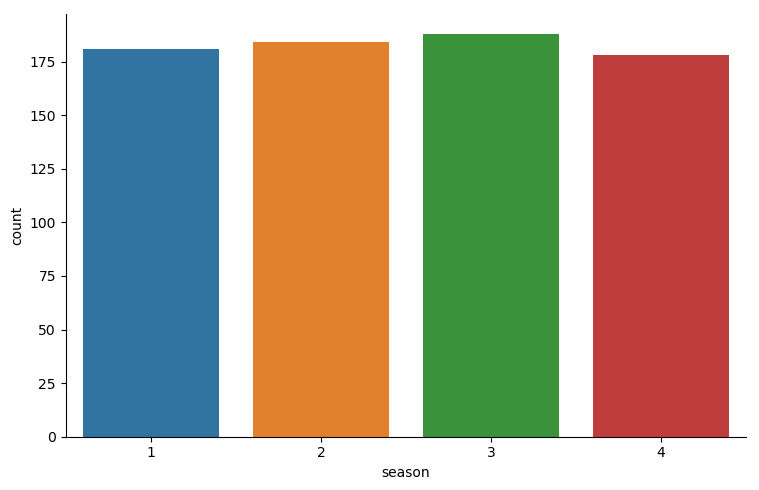

In [98]:
sns.factorplot(x='season',data=df,kind='count',size=5,aspect=1.5)

### season변수(를 포함한 변수들)에 따른 y변수 분포(upper right plot)

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

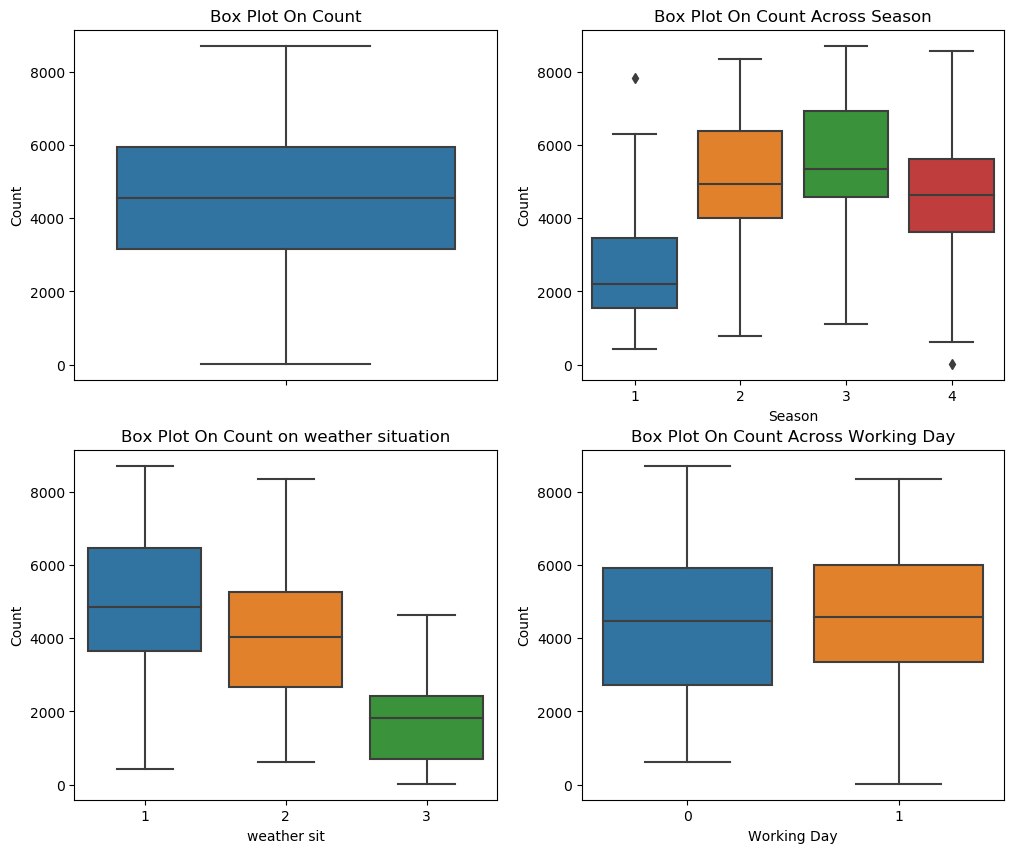

In [99]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=df,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=df,y="cnt",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=df,y="cnt",x="weathersit",orient="v",ax=axes[1][0])
sns.boxplot(data=df,y="cnt",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='weather sit', ylabel='Count',title="Box Plot On Count on weather situation")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

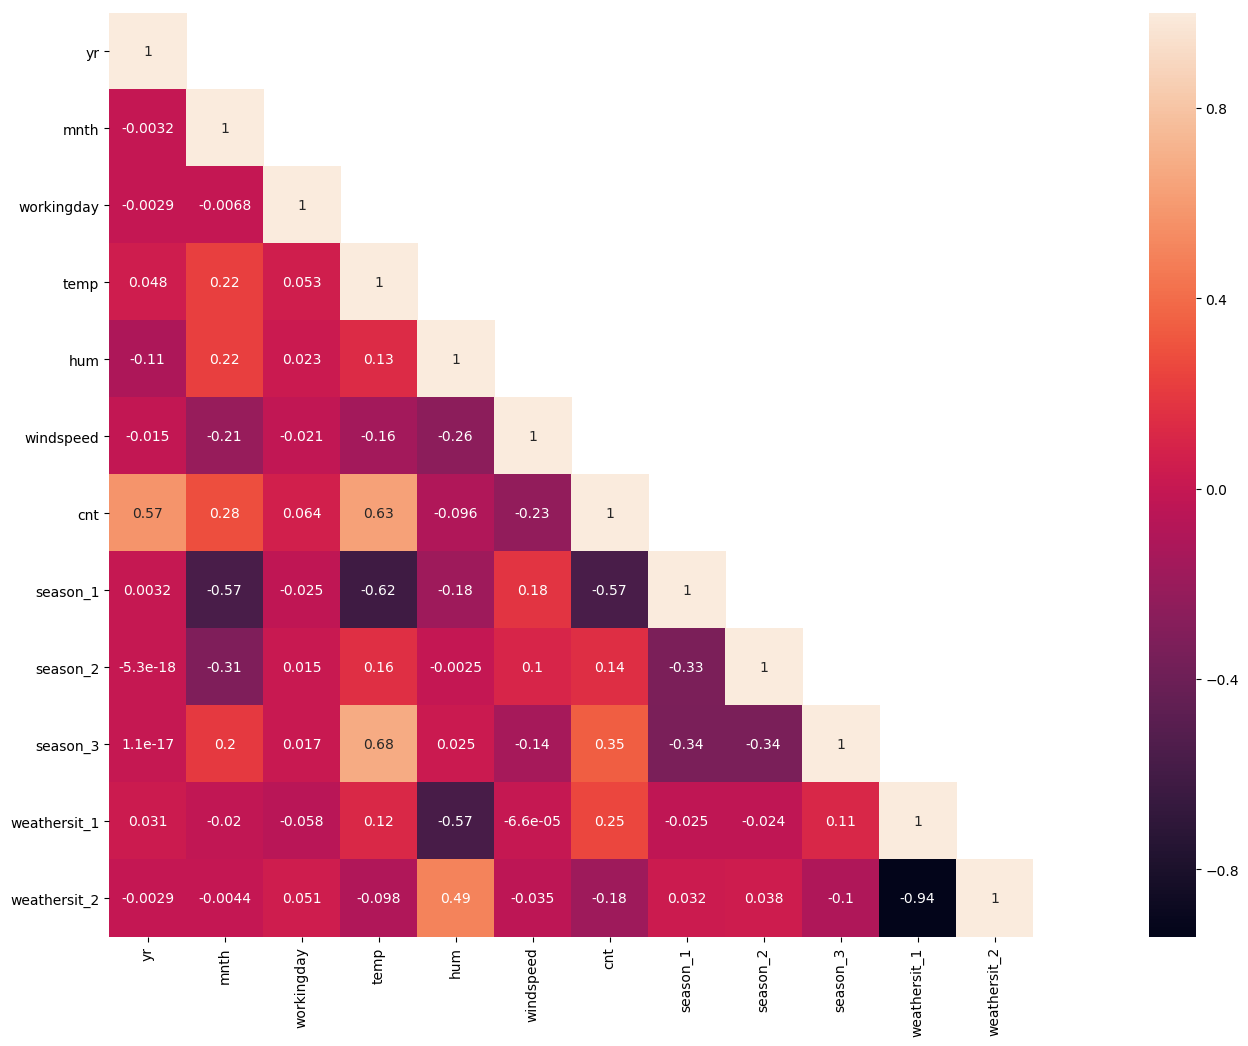

In [100]:
cor_mat= df2[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

### 다른 모든 변수를 제하고 season만 가지고 Linear Regression을 돌리는 경우

In [101]:
df4=df2.drop(['yr','mnth','workingday','temp','hum','windspeed','weathersit_1','weathersit_2'],1)
df4.head()

,cnt,season_1,season_2,season_3
0,985,1,0,0
1,801,1,0,0
2,1349,1,0,0
3,1562,1,0,0
4,1600,1,0,0


In [102]:
x4 = df4.loc[:, df4.columns != 'cnt']
y4 = df4['cnt']
y41 = np.log(df4['cnt'])

In [103]:
from sklearn.model_selection import train_test_split
x_train4, x_test4, y_train4, y_test4 = train_test_split(x4, y4, random_state=6, test_size=0.2)
x_train41, x_test41, y_train41, y_test41 = train_test_split(x4, y41, random_state=6, test_size=0.2)

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

lin = LinearRegression()
lin.fit(x_train4, y_train4)
y_pred4 = lin.predict(x_test4)

print('R-squared for Test: %.2f' %lin.score(x_test4, y_test4))

score = mean_squared_error(y_test4, y_pred4)
score = np.sqrt(score)
print("Root Mean Squared Error = {:.5f}".format(score))

R-squared for Test: 0.37
Root Mean Squared Error = 1542.20084


In [105]:
lin.coef_

array([-2053.98831321,   317.35764706,   902.62104842])

In [106]:
lin.intercept_

4688.8823529411775

### log변환을 안한 y에 대한 계수와 절편에 대한 해석을 할 수는 있으나 R2값이 매우 낮음에 유의

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

lin1 = LinearRegression()
lin1.fit(x_train41, y_train41)
y_pred41 = lin1.predict(x_test41)

print('R-squared for Test: %.2f' %lin1.score(x_test41, y_test41))

score = mean_squared_error(y_test41, y_pred41)
score = np.sqrt(score)
print("Root Mean Squared Error = {:.5f}".format(score))

R-squared for Test: 0.43
Root Mean Squared Error = 0.40433


In [108]:
lin1.coef_

array([-0.64624933,  0.06722953,  0.21663095])

In [109]:
lin1.intercept_

8.374641638264091

### y에 log변환을 한 경우 %증가에 대한 해석을 할 수는 있겠지만 여전히 R2가 낮음에 유의

In [110]:
lin2 = LinearRegression()

lin2.fit(x_train22, y_train22)
y_pred = lin2.predict(x_test22)

print('R-squared for Test: %.2f' %lin2.score(x_test22, y_test22))

score = mean_squared_error(y_test22, y_pred)
score = np.sqrt(score)
print("Root Mean Squared Error = {:.5f}".format(score))

R-squared for Test: 0.82
Root Mean Squared Error = 0.23046


In [111]:
lin2.coef_

array([ 0.4817696 , -0.00768321,  1.67103952, -0.79234066, -1.21684791,
       -0.52885182, -0.18480171, -0.30586126])

In [112]:
x22.head()

,yr,mnth,temp,hum,windspeed,season_1,season_2,season_3
0,0,1,0.344167,0.805833,0.160446,1,0,0
1,0,1,0.363478,0.696087,0.248539,1,0,0
2,0,1,0.196364,0.437273,0.248309,1,0,0
3,0,1,0.200000,0.590435,0.160296,1,0,0
4,0,1,0.226957,0.436957,0.186900,1,0,0


In [113]:
lin2.intercept_

8.257147638928624

### 앞서 RFR에서 성과가 좋았던 df2의 x변수를 LR에 돌린 경우 R2가 많이 개선되었다. 이 경우 season 계수들 (-0.52885182, -0.18480171, -0.30586126)에 대한 해석은 season에 영향을 미치는 다른 x변수들(yr, mnth, temp, hum, windspeed)의 편미분계수와 같이 해석할 수 있으나, 우리가 애초에 계절의 영향력을 살펴보고자 할 때 계절의 영향력에 다른 변수가 포함된 것인지에 대하여 따져볼 필요가 있겠다. 예컨데 계절에 따른 자전거 수요량을 살펴볼 때 온도나 습도와 같은 다른 변수들을 굳이 통제하려고 하지는 않지만 년도와 같은 변수들은 통제하고 싶어할 수도 있다. 

### kaggle의 kernel들을 많이 살펴보았으나 season이 y에 미치는 영향에 대한 해석이 담긴 kernel은 찾지 못했습니다. linear regression 이상의 복잡한 모델에서 각 계수들에 대한 해석이 어떻게 가능한지, 어느정도 r2가 담보되어야 계수들에 대한 해석이 정당화될 수 있는지에 대한 의문이 완전히 해결되지는 않은 것 같습니다.